I select the data from https://finance.yahoo.com/, the data is based on the stock of Apple Inc. (AAPL)


In [20]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
#loading the dataset of .csv file


target_data = "E:/02 Spring 2017 UGA/CSCI3360/Project/AAPL(Jan 2017 to Dec 2017).csv"
apple_stock = pd.read_csv(target_data, parse_dates = True)
apple_stock.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/2017,115.800003,116.330002,114.760002,116.150002,113.847588,28781900
1,1/4/2017,115.849998,116.510002,115.750000,116.019997,113.720161,21118100
2,1/5/2017,115.919998,116.860001,115.809998,116.610001,114.298462,22193600
3,1/6/2017,116.779999,118.160004,116.470001,117.910004,115.572708,31751900
4,1/9/2017,117.949997,119.430000,117.940002,118.989998,116.631294,33561900


After loading the data, Let's check the variable of data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
Date         251 non-null object
Open         251 non-null float64
High         251 non-null float64
Low          251 non-null float64
Close        251 non-null float64
Adj Close    251 non-null float64
Volume       251 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


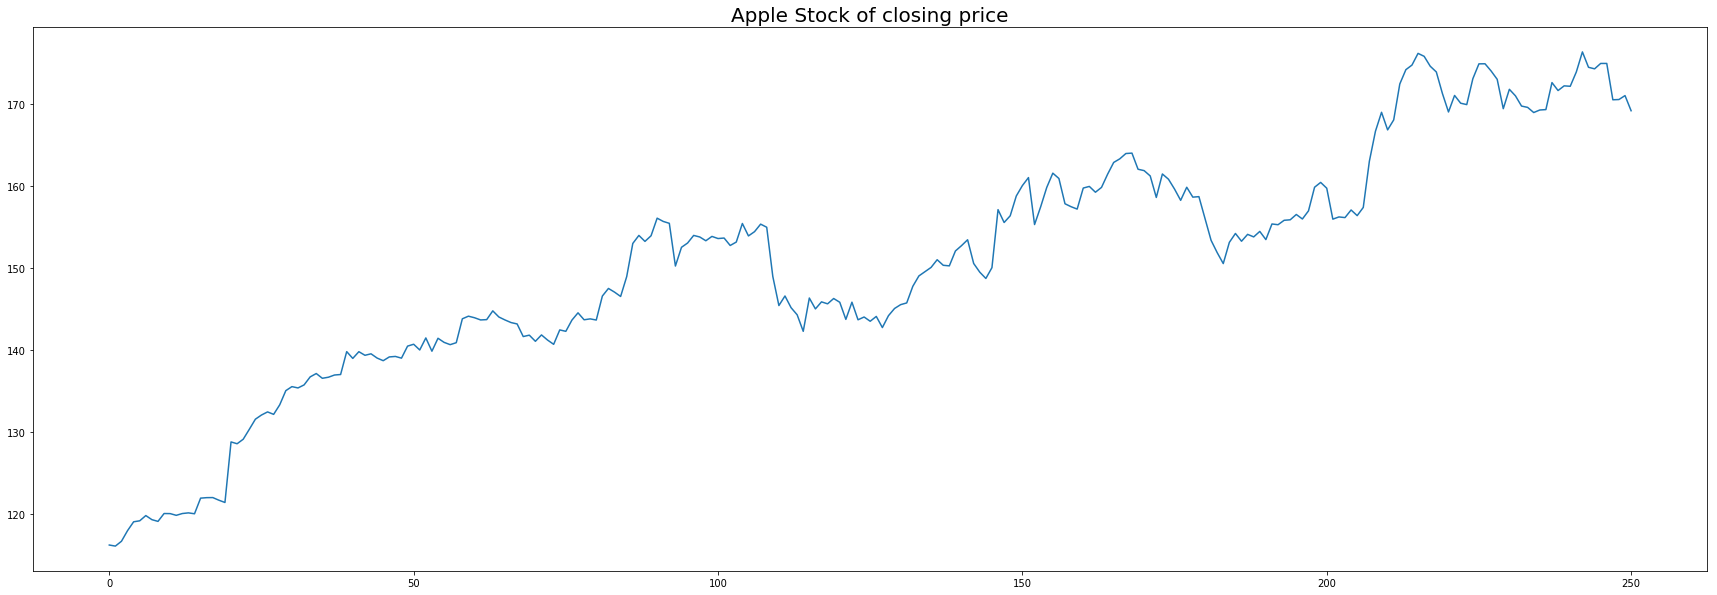

In [22]:
apple_stock.info()
plt.figure(figsize=(30,10))
plt.plot(apple_stock.index, apple_stock['Close'])
plt.title("Apple Stock of closing price", fontsize = 20)
plt.show()

Topic 1: Parabolic SAR
Introduction: The Parabolic SAR refers to a price-and-time-based trading system. SAR stands for “stop and reverse,” which is the actual indicator used in the system. SAR trails price as the trend extends over time. The indicator is below prices when prices are rising and above prices when prices are falling. In this regard, the indicator stops and reverses when the price trend reverses and breaks above or below the indicator. 

Source: http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:parabolic_sar

To calculate the SAR, We decide to calculate the SAR in two parts, raising and failing, to calculate the data of SAR, we need to calculate the extreme point, acceleration factor.
First, let's calculate the raising SAR

In [25]:
#calculate the raising SAR
exam_data01 = {'Date': apple_stock['Date'],'High': apple_stock['High'], 'Low': apple_stock['Low'], 'Close': apple_stock['Close']}

df = pd.DataFrame(exam_data01)

##print df
##print len(apple_stock)

##set up the new array 
Rextreme_point = []
acceleration_factor =[]
Rsar = []
## rows can be anything
for index, rows in apple_stock.iterrows():
    
    if (index == 0):
        Rextreme_point.append(rows['High'])
        acceleration_factor.append(0.02)
        Rsar.append(rows['Low'])

    else:
        if(rows['High'] > Rextreme_point[index-1]):
            Rextreme_point.append(rows['High'])
            
            if(acceleration_factor[index-1] <= 0.18):
                acceleration_factor.append(acceleration_factor[index-1] + 0.02)
            else:
                acceleration_factor.append(acceleration_factor[index-1])
        else:
            Rextreme_point.append(Rextreme_point[index-1])
            acceleration_factor.append(acceleration_factor[index - 1])
        Rsar.append(Rsar[index - 1] + acceleration_factor[index - 1]*(Rextreme_point[index - 1] - Rsar[index - 1]))
df['Rising Extreme Point'] = Rextreme_point

df['Rising Acceleration Factor'] = acceleration_factor

df['Rising SAR'] = Rsar
print df



          Close        Date        High         Low  Rising Extreme Point  \
0    116.150002    1/3/2017  116.330002  114.760002            116.330002   
1    116.019997    1/4/2017  116.510002  115.750000            116.510002   
2    116.610001    1/5/2017  116.860001  115.809998            116.860001   
3    117.910004    1/6/2017  118.160004  116.470001            118.160004   
4    118.989998    1/9/2017  119.430000  117.940002            119.430000   
5    119.110001   1/10/2017  119.379997  118.300003            119.430000   
6    119.750000   1/11/2017  119.930000  118.599998            119.930000   
7    119.250000   1/12/2017  119.300003  118.209999            119.930000   
8    119.040001   1/13/2017  119.620003  118.809998            119.930000   
9    120.000000   1/17/2017  120.239998  118.220001            120.239998   
10   119.989998   1/18/2017  120.500000  119.709999            120.500000   
11   119.779999   1/19/2017  120.089996  119.370003            120.500000   

Second Let's calculate the failing SAR

In [26]:
#calculate the failing SAR


Fextreme_point = []
acceleration_factor =[]
Fsar = []
## rows can be anything
for index, rows in apple_stock.iterrows():
    
    if (index == 0):
        Fextreme_point.append(rows['Low'])
        acceleration_factor.append(0.02)
        Fsar.append(rows['High'])

    else:
        if(rows['Low'] < Fextreme_point[index-1]):
            Fextreme_point.append(rows['Low'])
            
            if(acceleration_factor[index-1] <= 0.18):
                acceleration_factor.append(acceleration_factor[index-1] + 0.02)
            else:
                acceleration_factor.append(acceleration_factor[index-1])
        else:
            Fextreme_point.append(Fextreme_point[index-1])
            acceleration_factor.append(acceleration_factor[index - 1])
        Fsar.append(Fsar[index - 1] + acceleration_factor[index - 1]*(Fextreme_point[index - 1] - Fsar[index - 1]))
        
        
        
df['Falling Extreme Point'] = Fextreme_point

df['Falling Acceleration Factor'] = acceleration_factor

df['Falling SAR'] = Fsar
print df.head()


        Close      Date        High         Low  Rising Extreme Point  \
0  116.150002  1/3/2017  116.330002  114.760002            116.330002   
1  116.019997  1/4/2017  116.510002  115.750000            116.510002   
2  116.610001  1/5/2017  116.860001  115.809998            116.860001   
3  117.910004  1/6/2017  118.160004  116.470001            118.160004   
4  118.989998  1/9/2017  119.430000  117.940002            119.430000   

   Rising Acceleration Factor  Rising SAR  Falling Extreme Point  \
0                        0.02  114.760002             114.760002   
1                        0.04  114.791402             114.760002   
2                        0.06  114.860146             114.760002   
3                        0.08  114.980137             114.760002   
4                        0.10  115.234527             114.760002   

   Falling Acceleration Factor  Falling SAR  
0                         0.02   116.330002  
1                         0.02   116.298602  
2             

In [13]:
#check the upward and downward trend
datapoint = []

for index, rows in apple_stock.iterrows():
    if(index == 0):
        datapoint.append(rows['High'])
    else:
        if(Rsar[index]>Fsar[index]):
            datapoint.append(Rsar[index])
        else:
            datapoint.append(Fsar[index])
            
df['datapoint'] = datapoint

print df['datapoint']

0      116.330002
1      116.298602
2      116.267830
3      116.237673
4      116.208120
5      116.179158
6      116.150775
7      116.499467
8      116.911131
9      117.273395
10     117.688719
11     118.138524
12     118.516360
13     118.833743
14     119.189469
15     119.481164
16     120.004931
17     120.491945
18     120.881556
19     121.193246
20     121.442597
21     123.252078
22     124.699664
23     125.857732
24     126.786186
25     127.846948
26     128.721558
27     129.467246
28     130.161797
29     130.893439
          ...    
221    174.918087
222    175.182470
223    175.393977
224    175.563183
225    175.698547
226    175.806839
227    175.893472
228    175.962779
229    176.018224
230    176.062580
231    176.098065
232    176.126453
233    176.149163
234    176.167332
235    176.181866
236    176.193494
237    176.202796
238    176.210238
239    176.216191
240    176.220954
241    176.224764
242    176.227812
243    176.422249
244    176.577799
245    176

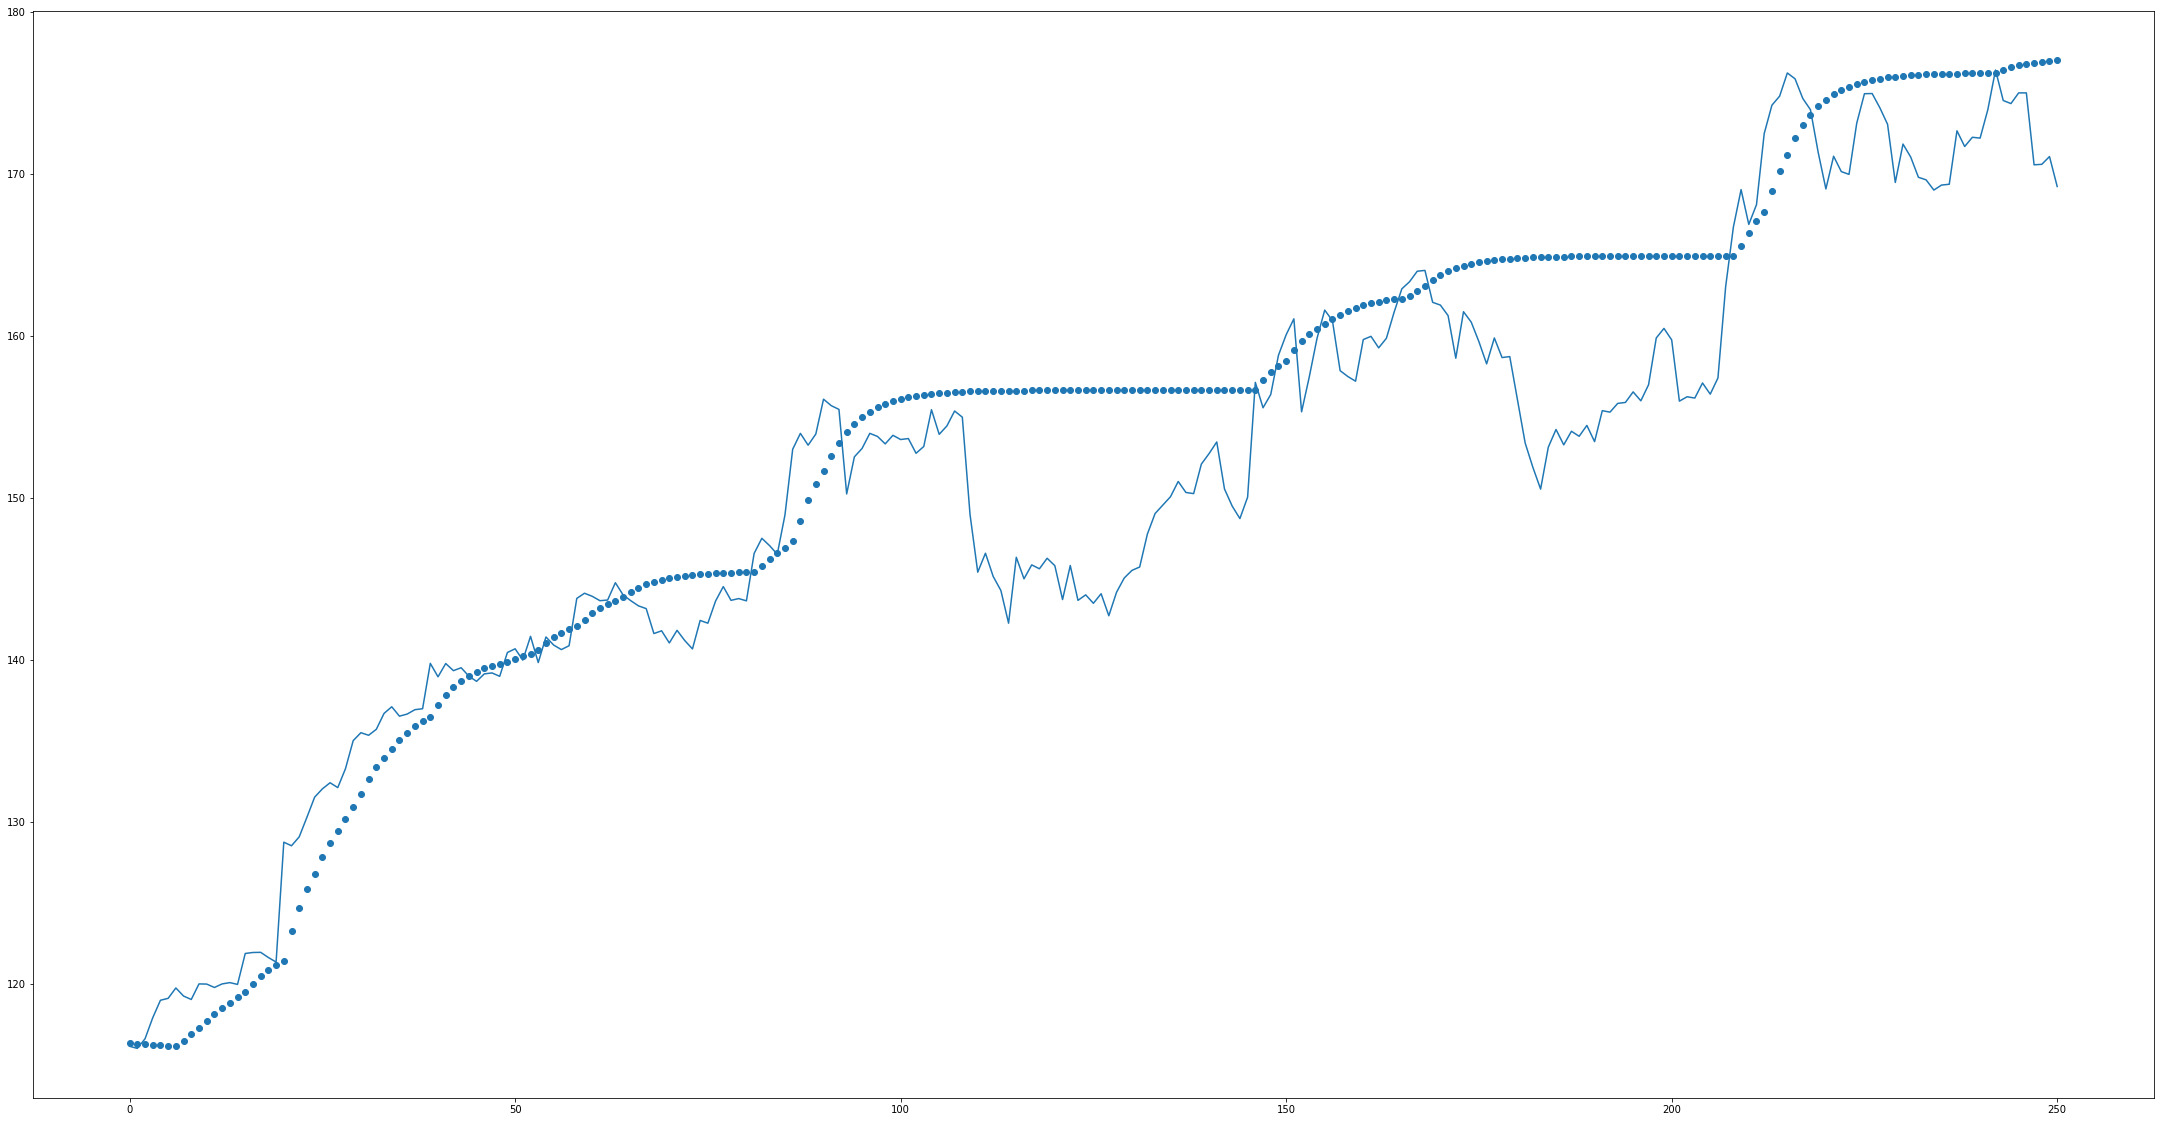

In [14]:
#do the scatter plot of rising and failing SAR
fig, ax = plt.subplots(1,1, figsize=(38,20))
x = df.index
y = df['Close']
plt.scatter(x, datapoint, alpha=1)
plt.plot(x, y, alpha=1)

plt.show()

Topic 2: Volume-by-price
Introduction: Volume-by-Price is an indicator that shows the amount of volume for a particular price range, which is based on closing prices. 

Source: http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:volume_by_price

In [16]:
#Volume by price

exam_data02={'Date':apple_stock['Date'],'Close': apple_stock['Close'],'Volume': apple_stock['Volume']}
df = pd.DataFrame(exam_data02)

print df.head()

        Close      Date    Volume
0  116.150002  1/3/2017  28781900
1  116.019997  1/4/2017  21118100
2  116.610001  1/5/2017  22193600
3  117.910004  1/6/2017  31751900
4  118.989998  1/9/2017  33561900


rank the data from low to high

In [17]:
#divide in 12 zones to calculate the

p_n = []


for index, rows in apple_stock.iterrows():
    if(index == 0):
        p_n.append('p')
    else: 
        if(rows['Close']>apple_stock.at[index-1, 'Close']):
            p_n.append('p')
        else:
            p_n.append('n')
df['p_n'] = p_n


In [18]:
##sort the data
df=df.sort_values(by='Close', ascending=True)
print df.head()

        Close      Date    Volume p_n
1  116.019997  1/4/2017  21118100   n
0  116.150002  1/3/2017  28781900   p
2  116.610001  1/5/2017  22193600   p
3  117.910004  1/6/2017  31751900   p
4  118.989998  1/9/2017  33561900   p


In [114]:
#divide the data

df_split = np.array_split(df, 12)
positive_val=[]
negative_val=[]


for i in range(len(df_split)):
    df_split[i]=df_split[i].reset_index(drop=True)
    #print df_split[i]
    print "The length of " + str(i+1) +"st zone is: " + str(len(df_split[i]))
    
    pv = 0
    nv = 0
    Total_VBP = 0
    for j in range(len(df_split[i])):
        Total_VBP+=df_split[i].at[j, 'Volume']
        if(df_split[i].at[j,'p_n']=='p'):
            pv+=df_split[i].at[j,'Volume']
        if(df_split[i].at[j,'p_n']=='n'): 
            nv+=df_split[i].at[j,'Volume']
    print "positive value: " + str(pv) + ", negative value: " + str(nv)
    print "Total value: "+ str(Total_VBP)
    if(pv > nv):
        print "The " + str(i+1) + " zone earn money!"
    elif(pv < nv):
        print "The " + str(i+1) + " zone do not earn!"
    positive_val.append(pv)
    negative_val.append(nv)
    print "--------------------------------------------------------------------------------"
    


The length of 1st zone is: 21
positive value: 336706000, negative value: 260126400
Total value: 596832400
The 1 zone earn money!
--------------------------------------------------------------------------------
The length of 2st zone is: 21
positive value: 477819900, negative value: 127114300
Total value: 604934200
The 2 zone earn money!
--------------------------------------------------------------------------------
The length of 3st zone is: 21
positive value: 248254600, negative value: 246842200
Total value: 495096800
The 3 zone earn money!
--------------------------------------------------------------------------------
The length of 4st zone is: 21
positive value: 147666900, negative value: 328573500
Total value: 476240400
The 4 zone do not earn!
--------------------------------------------------------------------------------
The length of 5st zone is: 21
positive value: 353578400, negative value: 229074600
Total value: 582653000
The 5 zone earn money!
------------------------------

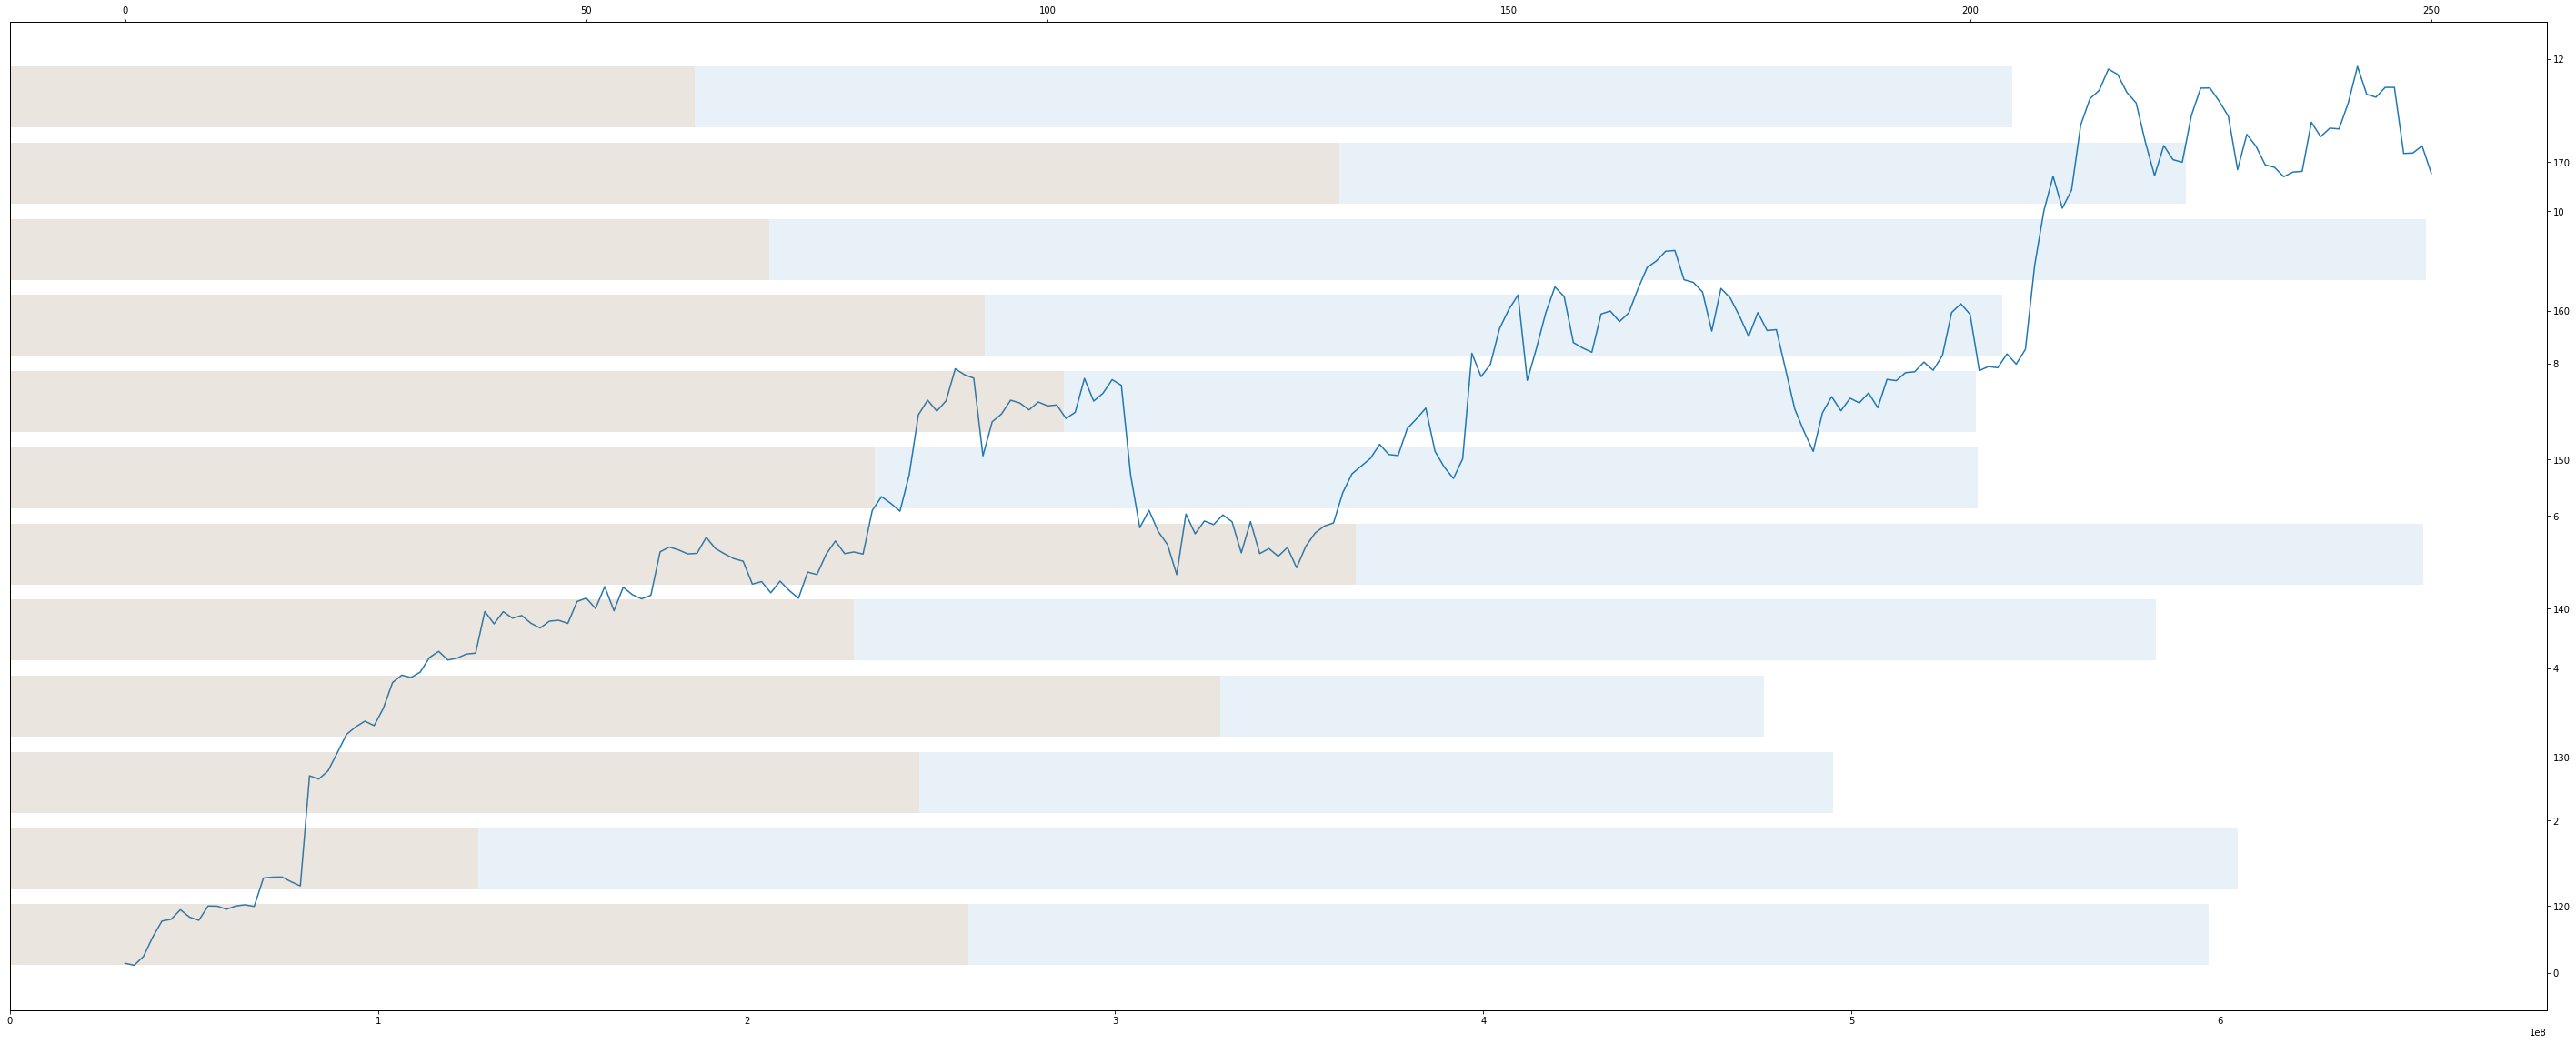

In [115]:
##make the bar chat
pos = np.arange(12)+.5
fig, ax1 = plt.subplots(figsize=(50,20))
ax2 = ax1.twinx().twiny()
ax2.barh(pos, width = np.add(positive_val,negative_val), alpha = 0.1)
ax2.barh(pos, width = negative_val, alpha = 0.1)
ax1.plot(apple_stock.index,apple_stock['Close'])
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()
ax1.xaxis.tick_top()
ax2.xaxis.tick_bottom()
plt.show()